Exercise: Support Vector Machines with the Iris Dataset
Stage 1:
(a) Import Libraries and Load the Dataset
Import the svm module from scikit-learn.
Load the Iris dataset using load_iris.
Train on the entire dataset without splitting into train and test sets.
Task:
Work with various SVM models using:
Different kernels (e.g., linear, rbf, poly).
Different values of the regularization parameter 
𝐶
C.
Identify which combination achieves the best score on the training dataset.
Display the decision function for each model.

In [1]:
# Step 1: Import necessary libraries
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np

# Step 2: Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Step 3: Train SVM models with different configurations
kernels = ['linear', 'rbf', 'poly']
C_values = [0.1, 1, 10]

best_model = None
best_score = 0

# Iterating over combinations of kernels and C values
for kernel in kernels:
    for C in C_values:
        model = SVC(kernel=kernel, C=C)
        model.fit(X, y)
        score = model.score(X, y)
        print(f"Kernel: {kernel}, C: {C}, Training Score: {score}")
        if score > best_score:
            best_score = score
            best_model = model

print("\nBest Model:")
print(best_model)

# Step 4: Display the decision function of the best model
decision_function = best_model.decision_function(X)
print("\nDecision Function Values:")
print(decision_function)


Kernel: linear, C: 0.1, Training Score: 0.9666666666666667
Kernel: linear, C: 1, Training Score: 0.9933333333333333
Kernel: linear, C: 10, Training Score: 0.98
Kernel: rbf, C: 0.1, Training Score: 0.94
Kernel: rbf, C: 1, Training Score: 0.9733333333333334
Kernel: rbf, C: 10, Training Score: 0.9866666666666667
Kernel: poly, C: 0.1, Training Score: 0.9866666666666667
Kernel: poly, C: 1, Training Score: 0.9733333333333334
Kernel: poly, C: 10, Training Score: 0.98

Best Model:
SVC(C=1, kernel='linear')

Decision Function Values:
[[ 2.24627744  1.2980152  -0.30616012]
 [ 2.23781119  1.29663601 -0.30453043]
 [ 2.24548583  1.2968967  -0.30542241]
 [ 2.23591041  1.29559718 -0.30371626]
 [ 2.24795778  1.29794432 -0.3062846 ]
 [ 2.23752685  1.29708102 -0.30477998]
 [ 2.2434869   1.2959543  -0.30466613]
 [ 2.24100113  1.2972027  -0.30517051]
 [ 2.23661182  1.2950946  -0.30347408]
 [ 2.2375786   1.29702254 -0.30474832]
 [ 2.24558626  1.29867717 -0.30648862]
 [ 2.23718064  1.2962742  -0.30425006]
 

(b) Examine Decision Function Values
Analyze the decision function for:
A data point you are confident about (e.g., an Iris Setosa instance).
A data point likely in a mixed class region (e.g., an Iris Versicolor instance).

In [2]:
# Step 1: Pick confident and ambiguous points
confident_index = 0  # Likely Iris Setosa (first instance)
ambiguous_index = 50  # Likely mixed region (first instance of Versicolor)

# Step 2: Display decision function values for these points
print("\nDecision Function for Confident Point (Iris Setosa):")
print(decision_function[confident_index])

print("\nDecision Function for Ambiguous Point (Iris Versicolor):")
print(decision_function[ambiguous_index])



Decision Function for Confident Point (Iris Setosa):
[ 2.24627744  1.2980152  -0.30616012]

Decision Function for Ambiguous Point (Iris Versicolor):
[-0.25888157  2.27018631  0.85169616]


Stage 2: Tuning Additional Parameters
Task:
For the rbf kernel, vary the gamma parameter.
For the poly kernel, vary the degree parameter.

In [3]:
# Step 1: Tune gamma for the RBF kernel
gamma_values = [0.1, 1, 10]
for gamma in gamma_values:
    model = SVC(kernel='rbf', C=1, gamma=gamma)
    model.fit(X, y)
    score = model.score(X, y)
    print(f"RBF Kernel, Gamma: {gamma}, Training Score: {score}")

# Step 2: Tune degree for the Polynomial kernel
degree_values = [2, 3, 4]
for degree in degree_values:
    model = SVC(kernel='poly', C=1, degree=degree)
    model.fit(X, y)
    score = model.score(X, y)
    print(f"Poly Kernel, Degree: {degree}, Training Score: {score}")


RBF Kernel, Gamma: 0.1, Training Score: 0.98
RBF Kernel, Gamma: 1, Training Score: 0.98
RBF Kernel, Gamma: 10, Training Score: 1.0
Poly Kernel, Degree: 2, Training Score: 0.9866666666666667
Poly Kernel, Degree: 3, Training Score: 0.9733333333333334
Poly Kernel, Degree: 4, Training Score: 0.98


Stage 3: Visualization and Advanced Tasks
(a) Plot Regions for Iris Species Prediction
Visualize the decision regions where a particular Iris species is predicted.

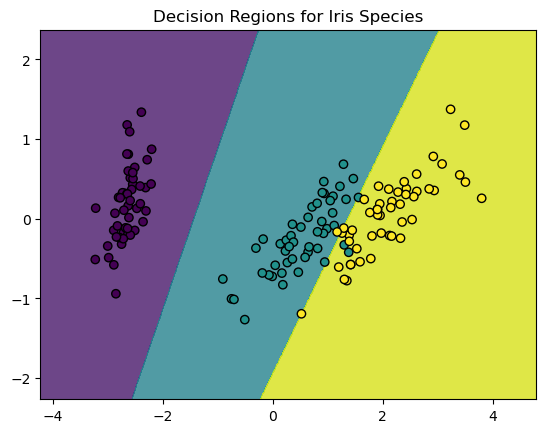

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Step 2: Train best model again for visualization
best_model.fit(X_reduced, y)

# Step 3: Plot decision regions
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='k')
plt.title("Decision Regions for Iris Species")
plt.show()


(b) Separate Iris Virginica
Attempt to separate Iris Virginica from the other species using:
New binary labels.
decision_function_shape='ovr' (one-vs-rest).
decision_function_shape='ovo' (one-vs-one).

In [5]:
# Step 1: Define binary labels for Virginica classification
y_binary = (y == 2).astype(int)  # Virginica as 1, others as 0

# Step 2: Train with 'ovr'
model_ovr = SVC(kernel='rbf', decision_function_shape='ovr')
model_ovr.fit(X, y_binary)

# Step 3: Train with 'ovo'
model_ovo = SVC(kernel='rbf', decision_function_shape='ovo')
model_ovo.fit(X, y_binary)

# Step 4: Compare scores
score_ovr = model_ovr.score(X, y_binary)
score_ovo = model_ovo.score(X, y_binary)

print(f"OVR Score: {score_ovr}")
print(f"OVO Score: {score_ovo}")


OVR Score: 0.9733333333333334
OVO Score: 0.9733333333333334


Stage 4: Experimentation
Train with unscaled data and observe changes in support vectors and decision functions.
Create custom datasets and try new kernels.
These additional exercises can be left as exploratory tasks for students to expand their skills.